In [1]:
import shap
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_app = pd.read_csv(
    "/home/natalia/Рабочий стол/new/Home_credit/application_train.csv",
    sep=",",
    encoding="cp1251",
)

In [3]:
target = data_app["TARGET"]

In [4]:
X = data_app.drop(["SK_ID_CURR", "TARGET"], axis=1)

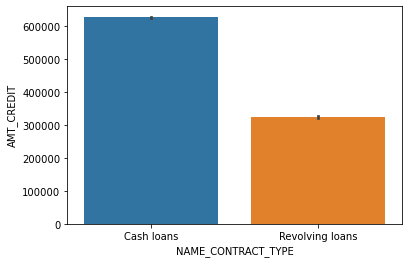

In [5]:
ax_cr = sns.barplot(x="NAME_CONTRACT_TYPE", y="AMT_CREDIT", data=data_app)

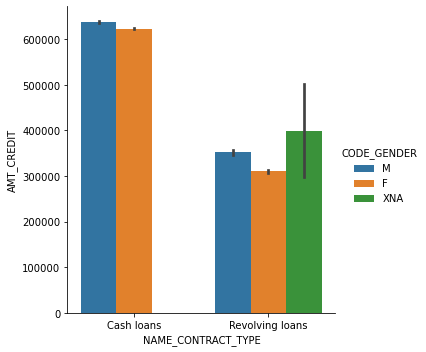

In [8]:
ax_contr = sns.catplot(x="NAME_CONTRACT_TYPE", y="AMT_CREDIT",
                       hue="CODE_GENDER", data=data_app, kind="bar")

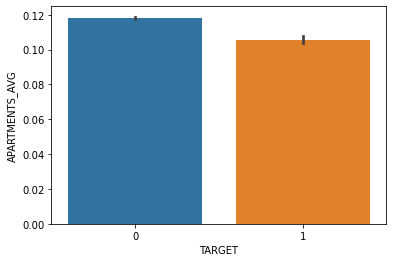

In [13]:
ax_apart = sns.barplot(x="TARGET", y="APARTMENTS_AVG", data=data_app)

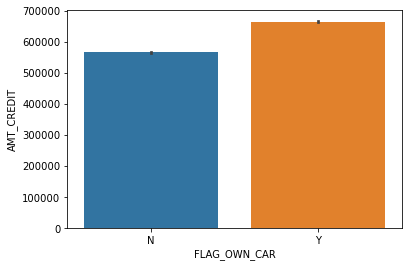

In [24]:
ax_car = sns.barplot(x="FLAG_OWN_CAR", y="AMT_CREDIT", data=data_app)

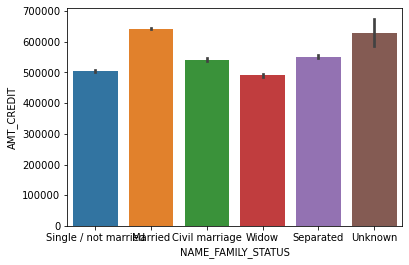

In [25]:
ax_status = sns.barplot(x="NAME_FAMILY_STATUS", y="AMT_CREDIT", data=data_app)

In [17]:
percent_ones = (data_app["TARGET"].sum())/(data_app["TARGET"].count())*100
print("percent one"', percent_ones)
print("percent zeros", 100 - percent_ones)

percent ones 8.072881945686495
percent zeros 91.92711805431351


Text(0, 0.5, 'percent')

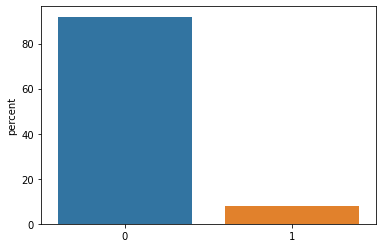

In [18]:
ax = sns.barplot(x=[0, 1], y=[100 - percent_ones, percent_ones])
ax.set_ylabel("target")
ax.set_ylabel("percent")

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3)

In [27]:
cat_features = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE",
                "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE",
                "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE",
                "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE"
                ]
params = {"learning_rate": 0.05,
          "num_iterations": 500,
          "max_depth": 7,
          "early_stopping_round": 30,
          }

In [28]:
for feature in cat_features:
    data_app[feature] = data_app[feature].astype("category")

In [32]:
model = LGBMClassifier(params, objective="binary")

In [33]:
type(X_train)
X_train.dtypes

NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 120, dtype: object

In [35]:
model.train(X_train, y_train, categorical_feature=cat_features)

AttributeError: 'LGBMClassifier' object has no attribute 'train'

In [ ]:
y_hat = model.predict(X_test)

In [ ]:
score = roc_auc_score(y_test, y_hat)

In [ ]:
explainer = shap.Explainer(model.predict, X_test)

In [ ]:
shap_values = explainer(X_test)

In [ ]:
shap.plots.bar(shap_values)